In [104]:
import numpy as np, tensorflow as tf, pandas as pd, matplotlib.pyplot as plt
import os
import AnOxPePred_funcs as AOf
from importlib import reload

In [54]:
data_path = 'Data'
result_path = 'Result'
embedding_file = os.path.join(data_path, 'One-hot_encoding.txt')
a_data = pd.read_csv(os.path.join(data_path, '03_p70_AO_db.csv'), index_col=0)

## Single model (for playing)

Train on 843 samples, validate on 280 samples
Epoch 1/100
843/843 [==============================] - 6s 8ms/sample - loss: 0.1997 - acc: 0.5172 - val_loss: 0.0109 - val_acc: 0.6250
Epoch 2/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.1521 - acc: 0.5516 - val_loss: 0.0104 - val_acc: 0.7000
Epoch 3/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.1351 - acc: 0.6014 - val_loss: 0.0104 - val_acc: 0.7750
Epoch 4/100
843/843 [==============================] - 1s 2ms/sample - loss: 0.1033 - acc: 0.6477 - val_loss: 0.0100 - val_acc: 0.7893
Epoch 5/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.0875 - acc: 0.6501 - val_loss: 0.0098 - val_acc: 0.8393
Epoch 6/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.0796 - acc: 0.7153 - val_loss: 0.0098 - val_acc: 0.8750
Epoch 7/100
843/843 [==============================] - 1s 2ms/sample - loss: 0.0800 - acc: 0.7011 - val_loss: 0.0095 - val_acc: 0.8857
Epoch 8/1

Epoch 61/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.0289 - acc: 0.8078 - val_loss: 0.0237 - val_acc: 0.9607
Epoch 62/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.0261 - acc: 0.8197 - val_loss: 0.0224 - val_acc: 0.9607
Epoch 63/100
843/843 [==============================] - 1s 2ms/sample - loss: 0.0266 - acc: 0.8066 - val_loss: 0.0234 - val_acc: 0.9571
Epoch 64/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.0242 - acc: 0.8138 - val_loss: 0.0235 - val_acc: 0.9500
Epoch 65/100
843/843 [==============================] - 1s 2ms/sample - loss: 0.0319 - acc: 0.7924 - val_loss: 0.0244 - val_acc: 0.9536
Epoch 66/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.0286 - acc: 0.8327 - val_loss: 0.0255 - val_acc: 0.9536
Epoch 67/100
843/843 [==============================] - 1s 1ms/sample - loss: 0.0268 - acc: 0.8090 - val_loss: 0.0243 - val_acc: 0.9571
Epoch 68/100
843/843 [==========================

,0.5_AUC,0.5_F1,0.5_MCC,0.5_AUC,0.5_F1,0.5_MCC,custom_AUC,custom_F1,custom_MCC,custom_AUC,custom_F1,custom_MCC,FRS_Threshold,CHEL_Threshold
metrics,0.750816,0.661479,0.37625,0.622642,0.2,0.229761,0.750816,0.716724,0.43043,0.622642,0.222222,0.344569,0.46,0.52


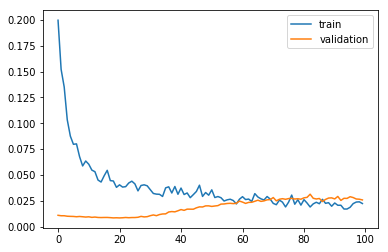

In [115]:
reload(AOf)

x_test, y_test, x_val, y_val, x_train, y_train = AOf.split_into_parts(a_data, test_part=3,val_part=4, embed_file=embedding_file)

hps = {'N_BATCH': 64,
       'y_out': y_test.shape[1]}
name = 'AnOxPePred'

model = 'model'
tf.keras.backend.clear_session()
del model

model = AOf.create_AnOxPePred_v1(hps)

EPOCHS = 100 # 20 seems optimal


es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=300, restore_best_weights=True, verbose=0)
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=hps['N_BATCH'], 
                    callbacks=[es], validation_data=(x_val, y_val), class_weight=None, verbose=1)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

y_pred = model.predict(x_test)
AOf.calc_metrics(y_test, y_pred, idx='metrics')

## Nested cross-validation (Performance measure)

In [ ]:
reload(AOf)

hps = {'N_BATCH': 64,
       'y_out': y_test.shape[1]}


result_df = pd.DataFrame()
PAR_VEC = [4,3,2,1,0]

# Loop training
for te_p in set(PAR_VEC):
    for va_p in set(PAR_VEC):
        if te_p != va_p:
            
            x_test, y_test, x_val, y_val, x_train, y_train = AOf.split_into_parts(a_data, test_part=te_p,val_part=va_p, 
                                                                                  embed_file=embedding_file)

            model = 'model'
            tf.keras.backend.clear_session()
            del model

            model = AOf.create_AnOxPePred_v1(hps)

            EPOCHS = 100# 50 seems optimal

            es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=300, restore_best_weights=True, verbose=0)

            history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=hps['N_BATCH'], 
                                callbacks=[es], validation_data=(x_val, y_val), verbose=0)

            y_pred = model.predict(x_test)
            name = str(te_p)+'_'+str(va_p)

            result_df = pd.concat([result_df, AOf.calc_metrics(y_test, y_pred, idx=name)])

In [113]:
result_df

""


In [ ]:
0.747570	0.671024	0.354892	0.647565	0.216216	0.173887	0.556	0.272

In [76]:
pd.concat([result_df.mean(),result_df.std()],axis=1).T

,0.5_AUC,0.5_F1,0.5_MCC,0.5_AUC,0.5_F1,0.5_MCC,custom_AUC,custom_F1,custom_MCC,custom_AUC,custom_F1,custom_MCC,FRS_Threshold,CHEL_Threshold
0,0.760567,0.698379,0.435197,0.603991,0.072149,0.075621,0.760567,0.690867,0.452247,0.603991,0.185776,0.193804,0.516500,0.448000
1,0.018070,0.027148,0.042402,0.099000,0.057633,0.086329,0.018070,0.028043,0.041208,0.099000,0.116832,0.111078,0.023232,0.091743


In [ ]:
0.644364	0.576983	0.222286	0.541614	0.101449	0.057448	0.556	0.270

In [44]:
result_df.to_csv(os.path.join(result_path,'04_AO_p60_results.csv'))

## Build the model

In [87]:
reload(AOf)

_, _, _, _, x_train, y_train = AOf.split_into_parts(a_data, test_part='',val_part='', embed_file=embedding_file)


hps = {'N_BATCH': 64,
       'y_out': y_train.shape[1]}
name = 'AnOxPePred'

model = 'model'
tf.keras.backend.clear_session()
del model

model = AOf.create_AnOxPePred_v1(hps)

EPOCHS = 300 # 

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=hps['N_BATCH'], verbose=0)

In [ ]:
model.save_weights(os.path.join(result_path,'AnOxPePred_v1'), save_format='tf')

In [110]:
imp_peps = AOf.data_augmentation(np.array(['LNIQFNIPTPKLC', 'CPFSSDDQFCLKVGV', 'FCLKVGVVHQNGKRRLALVKDNP','FCLKVGVIHQNGKRRLALVK', 'SSDDQFCLKVGVV',
                    'KKPVSKDSPETYEEALKRFAKLLSDRKKL', 'DSPETYEEALKRFAKLLSD', 'FDVIGGTSTGGLLTAMITTPNENNRP',  
                    'GIKGIIPAIILEFLEGQLQEVDNNKDAR','HHLP']), embedding_file)
pd.DataFrame(model.predict(imp_peps))

,0,1
0,0.706172,0.090162
1,0.294727,0.073000
2,0.870911,0.052615
3,0.707731,0.038144
4,0.216768,0.149007
5,0.113958,0.882367
6,0.188731,0.114033
7,0.859190,0.192569
8,0.964279,0.524003
9,0.592232,0.522867


In [70]:
pd.DataFrame(zip(y_pred[:,0], y_test[:,0])).sort_values(by=0, ascending=False)

,0,1
122,0.822731,1
277,0.803659,0
278,0.779007,0
43,0.753165,1
82,0.750555,1
248,0.750512,0
47,0.749337,1
108,0.744884,1
48,0.743574,1
239,0.737676,0
